# PCA 실습
신용카드 연체 예측

In [1]:
import pandas as pd
df = pd.read_csv("UCI_Credit_Card.csv")

print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [2]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
# 컬럼명 변경
df.rename(columns={"PAY_0":"PAY_1", "default.payment.next.month":"default"}, inplace=True)

# X,y 초기화
target = "default"
y_target = df[target]
X_features = df.drop(target, axis=1)

y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

## 예측 성능비교   
전체 원본 데이터와 PCA데이터 간 랜덤포레스트 예측 성능 비교

In [17]:
# 1. 원본 데이터
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)

# 랜덤포레스트 예측성능
scores = cross_val_score(rcf, X_features, y_target, scoring="accuracy", cv=3)

print("CV=3인 경우의 개별 Fold세트별 정확도", scores)
print("평균 정확도:{0:.4f}".format(np.mean(scores)))

CV=3인 경우의 개별 Fold세트별 정확도 [0.257  0.8209 0.784 ]
평균 정확도:0.6206


In [16]:
# 2. PCA 변환된 데이터

# scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 랜덤포레스트 예측성능
pca = PCA(n_components=7)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring="accuracy", cv=3)

print("CV=3인 경우의 PCA 개별 Fold세트별 정확도:", scores_pca)
print("PCA변환 데이터 셋 평균 정호가도:{0:.4f}".format(np.mean(scores_pca)))

CV=3인 경우의 PCA 개별 Fold세트별 정확도: [0.7879 0.7984 0.8061]
PCA변환 데이터 셋 평균 정호가도:0.7975


## PCA디테일하게

heatmap으로 보니 pay_1~pay6, bill_amt1~bill_amt6간 상관관계가 높다.  
그러니 이러한 상관도가 높은 피쳐들끼리는 PCA 진행!

<AxesSubplot: >

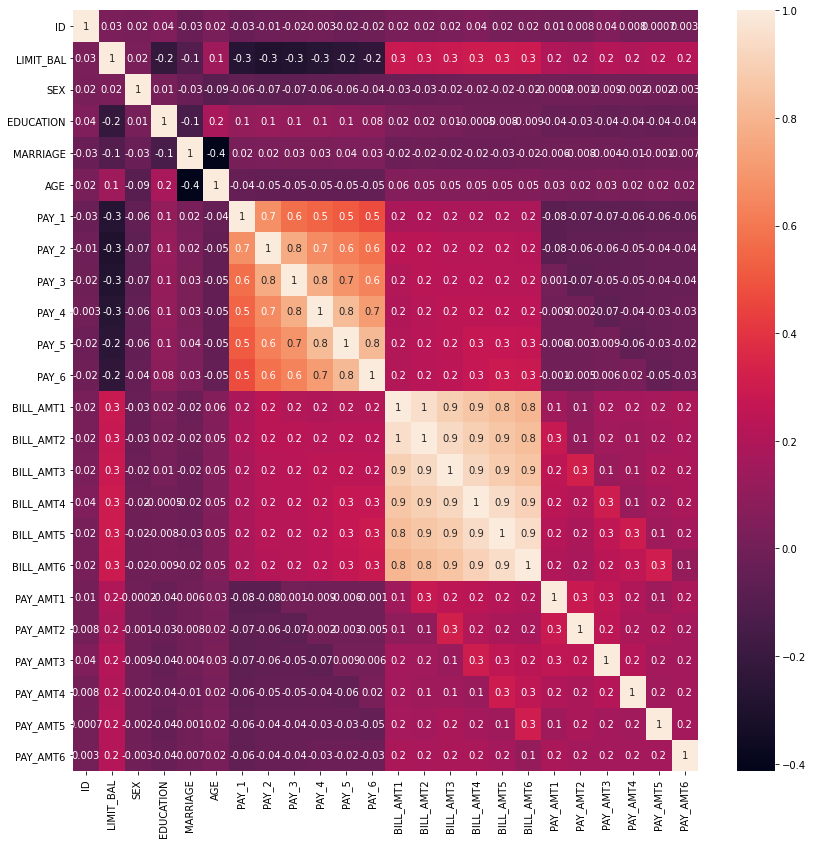

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr() # 상관관계표
plt.figure(figsize=(14,14)) # plot size
sns.heatmap(corr, annot=True, fmt=".1g") # plot heatmap

일부 상관도가 높은 피쳐들(BILL_AMT1~6)을 PCA(n_components=2) 변환 후 변동성 확인.  
-> 6개의 피쳐를 2개로 PCA변환했을 때 첫 번째 컴포넌트가 전체 변수의 90%를 설명한다.  
-> array를 df에 추가할 때 dataframe생성해서 concat으로 추가하지말고 아래처럼 새 컬럼 만들어서 바로 넣으면 됌

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. BILL_AMT
# 대상 속성
cols_bill = ["BILL_AMT"+str(i) for i in range(1,7)]
print("대상 속성명:", cols_bill)

# scale
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# pca
pca = PCA(n_components=2)
df_pca_bill = pca.fit_transform(df_cols_scaled)

## 변동성 확인 가능!
# print("PCA Component별 변동성:", pca.explained_variance_ratio_)
X_features[['component1', "component2"]] = df_pca_bill

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [31]:
X_features

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,component1,component2
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,-1.611148,0.012479
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,-1.547595,-0.062344
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,-1.035874,0.011256
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,-0.250712,0.174374
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,-0.968951,-0.213032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,2.610194,2.419078
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,-1.521009,-0.066271
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,-1.195519,-0.359507
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,-0.008293,-0.049958


In [ ]:
# 2. BILL_AMT1~6

# 대상 속성
cols_bill = ["BILL_AMT"+str(i) for i in range(1,7)]
print("대상 속성명:", cols_bill)

# scale
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# pca
pca = PCA(n_components=2)
df_pca_bill = pca.fit(df_cols_scaled)

print("PCA Component별 변동성:", pca.explained_variance_ratio_)

## PCA 디테일하게


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 대상 속성
cols_bill = ["BILL_AMT"+str(i) for i in range(1,7)]
print("대상 속성명:", cols_bill)

# scale
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# pca
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print("PCA Component별 변동성:", pca.explained_variance_ratio_)